### BEYOND THE ALGEBRA: WHAT IS GOING ON WITH OUR ENGINEERING STUDENTS?

This work seeks to calculate statistical data to understand, in addition to the difficulties in mathematics subjects which are historically a challenge, why are students currently giving up on graduation?

Check the post at: https://medium.com/@abrao.vinicius/beyond-the-algebra-what-is-going-on-with-our-engineering-students-35cbdd7bedf

To get started let's read in the necessary libraries and the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

data=pd.read_csv('data.csv')

In the sequence we fill NaN values with zeros, since it is just miss typing of the zero when the questionnaire was made.
We also to transpose the data because the different students answers was in columns. We want the students as our index, each student in one line and each question in one column.

In [4]:
data=data.fillna(0)
data=data.rename(columns={"question":"student"})
data=data.set_index('student')
data=data.T
print(data.head())

student     1    2    3    4    5    6    7    8    9    10  ...   73   74  \
student 1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
student 2  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
student 3  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  ...  1.0  0.0   
student 4  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
student 5  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0   

student     75   76   77   78   79   80   81   82  
student 1  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
student 2  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
student 3  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
student 4  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
student 5  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  

[5 rows x 82 columns]


The first question we want to answer is: 'Which are the valuation method that most contributes to your learning?'
So, the correspondent columns are choseen and renamed. The students answer in each coloumn, for each method, a number from 1 o 6, in a scale of methods that most contributes to their learning.
We use the countplot to see the results.

Text(0.5, 1.0, 'Which are the valuation method that most contributes to your learning?')

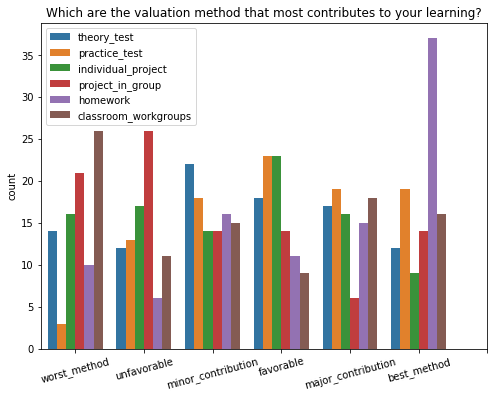

In [6]:
data=data.rename(columns={24:"theory_test"})
data=data.rename(columns={25:"practice_test"})
data=data.rename(columns={26:"individual_project"})
data=data.rename(columns={27:"project_in_group"})
data=data.rename(columns={28:"homework"})
data=data.rename(columns={29:"classroom_workgroups"})
columns_list=["theory_test","practice_test","individual_project","project_in_group",
              "homework","classroom_workgroups"]
answer_list=["worst_method","unfavorable", "minor_contribution","favorable",
             "major_contribution","best_method"]
n=data["theory_test"].size
question_six=[]
answer_six=[]
for column in columns_list:
    for i in range(n):
        question_six.append(column)
        answer_six.append(data[column][i])  
df = pd.DataFrame(list(zip(question_six,answer_six)),columns=['question_six','answer_six']) 
df = df[df.answer_six != 0]
plt.figure(figsize=[8,6])
ax=sb.countplot(x='answer_six',hue='question_six',data=df)
plt.xticks(range(7),answer_list,rotation=15)
plt.xlabel('')
plt.legend(title='')
plt.title('Which are the valuation method that most contributes to your learning?')

The next question we want to answer is:'What are your favorite areas in Mechanical Engineering?'
Given some possible choices, the student chose some areas in which he would like to work in the future. The correspondent columns values are 1.

Text(0.5, 1.0, 'What are your favorite areas in Mechanical Engineering?')

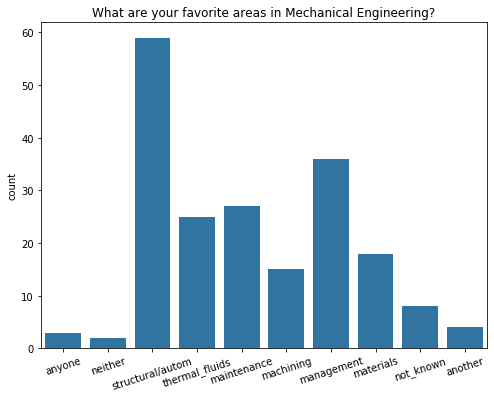

In [9]:
columns_list=["anyone","neither","structural/autom","thermal_fluids",
              "maintenance","machining","management","materials","not_known","another"]
question_nine=data[data.columns[40:50]]
plt.figure(figsize=[8,6])
answer_nine=question_nine.sum()
base_color = sb.color_palette()[0]
sb.barplot(columns_list,answer_nine, color= base_color)
plt.xticks(rotation=18)
plt.ylabel('count')
plt.title('What are your favorite areas in Mechanical Engineering?')

The next question we want to answer is:'Which courses do you had lower performance?' Given some possible choices, the student chose some areas they have low grades. The correspondent columns values are 1.

Text(0.5, 1.0, 'Which courses do you had lower performance?')

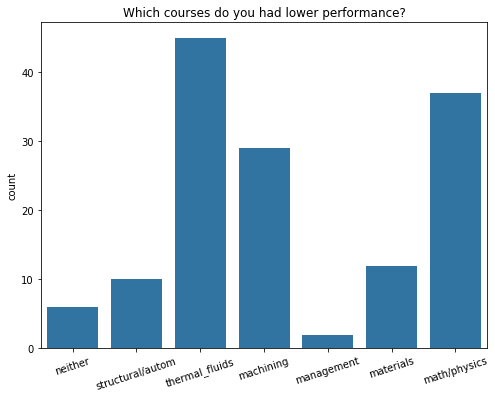

In [10]:
columns_list=["neither","structural/autom","thermal_fluids",
              "machining","management","materials","math/physics"]
question_ten=data[data.columns[50:57]]
plt.figure(figsize=[8,6])
answer_ten=question_ten.sum()
sb.barplot(columns_list,answer_ten, color= base_color)
plt.xticks(rotation=18)
plt.ylabel('count')
plt.title('Which courses do you had lower performance?')

The next question we want to answer is:'How many courses do you have in a semester?' The answer should be the number of disciplines.

Text(0.5, 1.0, 'How many courses do you have in a semester?')

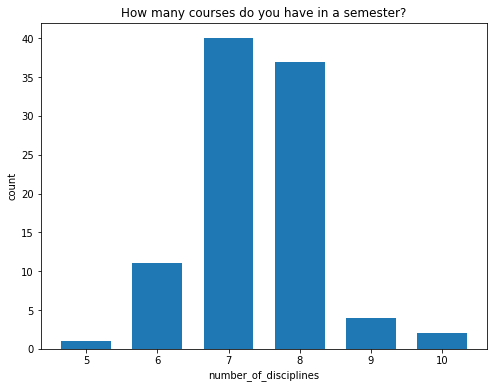

In [11]:
data=data.rename(columns={60:"number_disciplines"})
answer_twelve=data[data.number_disciplines != 0]
plt.figure(figsize=[8,6])
bins=np.arange(4.5,11.5,1)
plt.hist(data=answer_twelve, x='number_disciplines', bins=bins, rwidth=0.7)
plt.xlabel('number_of_disciplines')
plt.ylabel('count')
plt.title('How many courses do you have in a semester?')

The next question we want to answer is:'Do you have problem to manage your time for studying?' In this case we check if the student answer both or neither 'yes' (column value equals 1) and 'no' (column value equals 0) and eliminate these cases.

Text(0.5, 1.0, 'Do you have problem to manage your time for studying?')

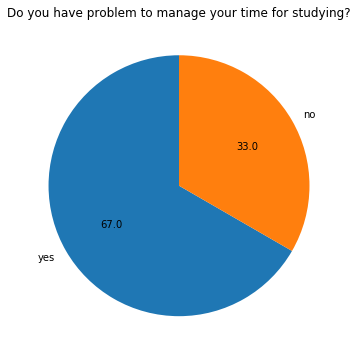

In [14]:
def absolute_value(val):
    a  = np.round(val)
    return a
columns_list=["yes","no"]

#mark none or both yes/no
#mark_both=data[data[data.columns[58]]+data[data.columns[57]]==2]
#mark_none=data[data[data.columns[58]]+data[data.columns[57]]==0]
question_eleven=data.drop(['student 7', 'student 79', 'student 89']) 
plt.figure(figsize=[8,6])
plt.pie(question_eleven[58].value_counts(),labels=columns_list,startangle=90,
        autopct=absolute_value)   
plt.title('Do you have problem to manage your time for studying?')

The next question we want to answer is:'How emotionally stable are you?' The answer should be yes (1) for one of the options.

Text(0.5, 1.0, 'How emotionally stable are you?')

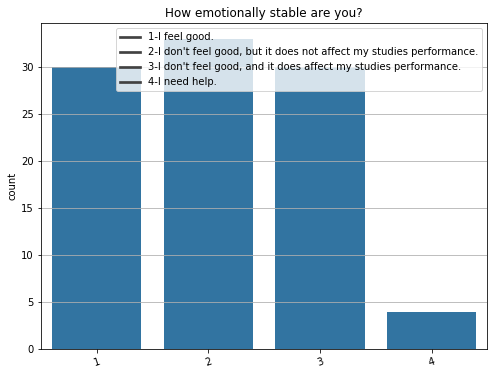

In [16]:
legend_list=["1-I feel good.",
              "2-I don't feel good, but it does not affect my studies performance.",
              "3-I don't feel good, and it does affect my studies performance.",
              "4-I need help."]
columns_list=['1','2','3','4']
question_sixteen=data[data.columns[72:76]]
plt.figure(figsize=[8,6])
answer_sixteen=question_sixteen.sum()
sb.barplot(columns_list,answer_sixteen, color= base_color)
plt.xticks(rotation=18)
plt.ylabel('count')
plt.legend(legend_list)
plt.grid(axis="y")
plt.title('How emotionally stable are you?')

Next we have the heatmap of the correlation matrix including the variables analysed in the whole work.

Text(0.5, 32.09375, '')

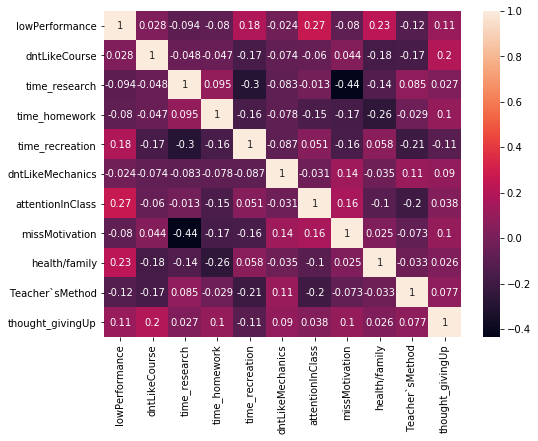

In [18]:
data=data.rename(columns={4:"lowPerformance"})
data=data.rename(columns={5:"dntLikeCourse"})
data=data.rename(columns={6:"time_research"})
data=data.rename(columns={7:"time_homework"})
data=data.rename(columns={8:"time_recreation"})
data=data.rename(columns={9:"dntLikeMechanics"})
data=data.rename(columns={10:"attentionInClass"})
data=data.rename(columns={11:"missMotivation"})
data=data.rename(columns={12:"health/family"})
data=data.rename(columns={13:"Teacher`sMethod"})
data=data.rename(columns={82:"thought_givingUp"})
problems=data[["lowPerformance","dntLikeCourse","time_research","time_homework","time_recreation",
                 "dntLikeMechanics","attentionInClass","missMotivation","health/family",
                 "Teacher`sMethod","thought_givingUp"]]
plt.figure(figsize=[8,6])
sb.heatmap(problems.corr(),annot=True)
plt.ylabel('')
plt.xlabel('')

The next question we want to answer is:'How often do you go parties/recreation?' The answer should be yes (1) for one of the options.

Text(0.5, 1.0, 'How often do you go parties/recreation?')

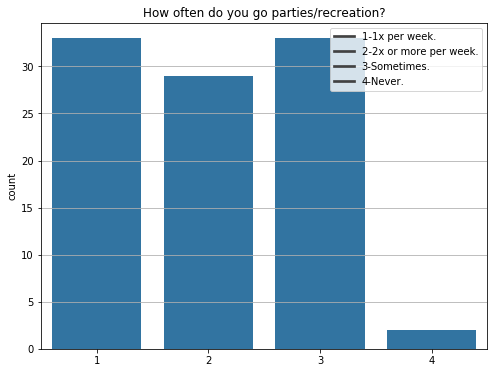

In [20]:
legend_list=["1-1x per week.",
              "2-2x or more per week.",
              "3-Sometimes.",
              "4-Never."]
columns_list=['1','2','3','4']
question_seventeen=data[data.columns[76:80]]
plt.figure(figsize=[8,6])
answer_seventeen=question_seventeen.sum()
sb.barplot(columns_list,answer_seventeen, color= base_color)
plt.ylabel('count')
plt.legend(legend_list)
plt.grid(axis="y")
plt.title('How often do you go parties/recreation?')

At the end we print the percentage number of student that have thought about giving up.

In [22]:
print('Have you thought about giving up?')
print(data["thought_givingUp"].sum()/n)

Have you thought about giving up?
0.5625
